In [1]:
import numpy as np

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
precomputed_graph = np.load('precomputed_graph.npy')

In [20]:
graph = nx.convert_matrix.from_numpy_array(precomputed_graph)

In [71]:
len(precomputed_graph[0])

3494

In [21]:
G = nx.minimum_spanning_tree(graph, weight='weight')

In [121]:
G[125]

AtlasView({678: {'weight': 0.9549999833106995}, 2993: {'weight': 0.9599999785423279}, 2730: {'weight': 0.9649999737739563}, 1215: {'weight': 0.9700000286102295}, 2571: {'weight': 0.9700000286102295}, 3418: {'weight': 0.9700000286102295}, 2475: {'weight': 0.9750000238418579}})

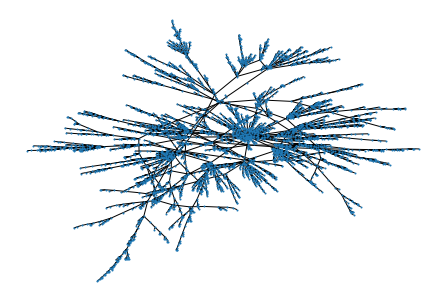

In [48]:
pos = nx.spring_layout(G, iterations=300)
nx.draw(G, pos, with_labels=False, node_size=1)
plt.show()
# find a cut of n-edges that separates the graph in k-subgraphs
# and each subgraph has a minimal distance within itself

In [54]:
import pandas as pd

ModuleNotFoundError: No module named 'pandas'

In [66]:
# foo = list(G.degree()).sort(key=lambda x: x[0])
sorted(list(G.degree()), key = lambda x: int(x[1]), reverse=True)[:7]

[(150, 96),
 (1130, 29),
 (989, 25),
 (728, 24),
 (1376, 23),
 (1902, 23),
 (521, 20)]

In [74]:
shortest_paths = nx.shortest_path_length(G)

In [87]:
a , foo = next(shortest_paths)

In [89]:
foo

{1: 0,
 612: 1,
 2566: 1,
 2999: 1,
 586: 1,
 2511: 1,
 1946: 2,
 2182: 2,
 461: 2,
 307: 2,
 3369: 2,
 3492: 2,
 566: 3,
 2084: 3,
 2774: 3,
 2248: 3,
 2253: 3,
 1023: 3,
 2533: 3,
 905: 3,
 2990: 3,
 3193: 3,
 1808: 4,
 140: 4,
 1478: 4,
 1684: 4,
 63: 4,
 2460: 4,
 2955: 4,
 1784: 4,
 1819: 4,
 150: 5,
 1853: 5,
 3439: 5,
 587: 5,
 2462: 5,
 2713: 5,
 3339: 5,
 555: 5,
 703: 5,
 842: 5,
 1022: 5,
 2133: 5,
 2948: 5,
 1040: 5,
 855: 5,
 2026: 5,
 2461: 5,
 2603: 5,
 2720: 5,
 1617: 5,
 1463: 5,
 3326: 5,
 989: 6,
 1376: 6,
 2757: 6,
 1902: 6,
 2334: 6,
 3447: 6,
 1130: 6,
 2200: 6,
 1423: 6,
 681: 6,
 1397: 6,
 3103: 6,
 3140: 6,
 3456: 6,
 1379: 6,
 1266: 6,
 345: 6,
 851: 6,
 924: 6,
 1196: 6,
 1893: 6,
 2167: 6,
 2252: 6,
 2358: 6,
 2598: 6,
 2646: 6,
 293: 6,
 589: 6,
 627: 6,
 897: 6,
 911: 6,
 987: 6,
 1605: 6,
 1791: 6,
 835: 6,
 902: 6,
 1002: 6,
 1016: 6,
 1017: 6,
 1953: 6,
 1956: 6,
 1962: 6,
 2005: 6,
 2033: 6,
 2132: 6,
 3420: 6,
 16: 6,
 198: 6,
 814: 6,
 819: 6,
 940: 

In [112]:
shortest_paths = nx.shortest_path_length(G, weight='weight')
shortest_paths_array = np.empty([len(precomputed_graph), len(precomputed_graph[0])], dtype=float)
iterator_true = True
while iterator_true:
    
    try:
        node_a, dict_a = next(shortest_paths)
        for node_b, value in dict_a.items():
            shortest_paths_array[node_a, node_b] = value
    except:
        iterator_true = False

In [122]:
di_graph = nx.convert_matrix.from_numpy_array(precomputed_graph, create_using=nx.DiGraph)

In [123]:
import networkx as nx
from networkx.algorithms import community
# G = nx.barbell_graph(5, 1)

communities_generator = community.girvan_newman(di_graph)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))

KeyboardInterrupt: 

In [23]:
backup_graph = G

In [119]:
G = backup_graph

In [5]:
from sklearn.neighbors import NearestNeighbors

In [16]:
node_set = list(nx.nodes(G))

In [17]:
len(node_set)

3494

In [43]:
ordered_nodes = {}
inverse_index_nodes = {}
node_set = list(nx.nodes(G))
length_new_set = 0
length_old_set = len(node_set)
count = 0
while count == 0 and len(node_set) > 1 and length_new_set != length_old_set:
# get degree of neighbor nodes
    degree_of_nodes = G.degree()
    order_of_nodes = []
    degree_one = []
    print('iteration {}'.format(count))
    count += 1
    for key, value in dict(degree_of_nodes).items():
    #     print('{}::{}'.format(key, value))
        if value == 1:
            degree_one.append((key, value))

    dict_conflict_nodes = {}
    nodes_to_remove = []
    for key, value in degree_one:
    #     print()
    #     print('{}::{}'.format(key, value))

    #     print(G.edges(key))
    #     print(list(G.edges(key))[0][1])
        list_nodes = []
        next_node = True
        search_key = key
#         print('key {}'.format(key))
        nodes_visited = []
        old_key = -1
        while next_node:
#             old_key = search_key
            nodes_visited.append(search_key)
            list_neighbors = list(G.edges(search_key))
            print('old_key {} key {} search_key {} list neighbors{} len {}'.format(old_key, key, search_key, list_neighbors, len(list_neighbors)))
            if len(list_neighbors) == 1:
                old_key = search_key
                search_key = list_neighbors[0][1]
                list_nodes.append(search_key)
                
            elif len(list_neighbors) == 2:
                old_key = search_key
                
                list_nodes.append(search_key)
                
                for neighbor in list_neighbors:
                    if neighbor[1] not in list_nodes and neighbor[1] not in nodes_visited:
                        print('search_key {}'.format(old_key))
                        print(list(G.edges(search_key)))
                        search_key = neighbor[1]
                        
                if search_key == old_key:
#                         old_key = search_key
                    next_node = False
                    if search_key in dict_conflict_nodes:
                        dict_conflict_nodes[search_key].append(list_nodes)
                    else:
                        dict_conflict_nodes[search_key] = [list_nodes]
                    for node_list in list_nodes:
                        if node_list in inverse_index_nodes:
                            inverse_index_nodes[node_list].append(search_key)
                        else:
                            inverse_index_nodes[node_list] = [search_key]
            elif len(list_neighbors) > 2:
                next_node = False
                if search_key in dict_conflict_nodes:
                    dict_conflict_nodes[search_key].append(list_nodes)
                else:
                    dict_conflict_nodes[search_key] = [list_nodes]
                for node_list in list_nodes:
                    if node_list in inverse_index_nodes:
                        inverse_index_nodes[node_list].append(search_key)
                    else:
                        inverse_index_nodes[node_list] = [search_key]
#             old_key = search_key
            
    #     print('Key {} Edge {} Degree {}'.format(key,G.edges(key), G.degree(list(G.edges(key))[0][1]) ))
    # print(dict_conflict_nodes)
    
#     length_old_set = len(list(nx.nodes(G)))
#     for key, value in dict_conflict_nodes.items():
#         nodes_list = [item for sublist in value for item in sublist]
#         if len(nodes_list) == 0:
#             continue
#     #     nodes_list.append(key)
#         matrix_minhash = precomputed_graph[nodes_list, :]
#         nbrs = NearestNeighbors(n_neighbors=len(nodes_list)).fit(matrix_minhash)
#     #     print()
#         distances, indices = nbrs.kneighbors([list(precomputed_graph[key, :])])
#         ordered_nodes[key] = np.array(nodes_list)[indices[0]]
#         for node in ordered_nodes[key]:
#             try:
#                 G.remove_node(node)
#             except:
#                 print('Node not in graph : {}'.format(node))
#     node_set = list(nx.nodes(G))
#     length_new_set = len(list(nx.nodes(G)))
    
    

iteration 0
old_key -1 key 3 search_key 3 list neighbors[(3, 2203)] len 1
old_key 3 key 3 search_key 2203 list neighbors[(2203, 1718), (2203, 2558), (2203, 3), (2203, 2525)] len 4
old_key -1 key 4 search_key 4 list neighbors[(4, 1231)] len 1
old_key 4 key 4 search_key 1231 list neighbors[(1231, 632), (1231, 1189), (1231, 4), (1231, 446), (1231, 1197), (1231, 3383)] len 6
old_key -1 key 6 search_key 6 list neighbors[(6, 716)] len 1
old_key 6 key 6 search_key 716 list neighbors[(716, 3066), (716, 6), (716, 3282)] len 3
old_key -1 key 13 search_key 13 list neighbors[(13, 475)] len 1
old_key 13 key 13 search_key 475 list neighbors[(475, 359), (475, 13), (475, 756)] len 3
old_key -1 key 18 search_key 18 list neighbors[(18, 953)] len 1
old_key 18 key 18 search_key 953 list neighbors[(953, 1086), (953, 1437), (953, 398), (953, 2289), (953, 18), (953, 84)] len 6
old_key -1 key 28 search_key 28 list neighbors[(28, 139)] len 1
old_key 28 key 28 search_key 139 list neighbors[(139, 2041), (139, 28

search_key 167
[(167, 570), (167, 1732)]
old_key 167 key 1732 search_key 570 list neighbors[(570, 3447), (570, 167)] len 2
search_key 570
[(570, 3447), (570, 167)]
old_key 570 key 1732 search_key 3447 list neighbors[(3447, 150), (3447, 570), (3447, 172), (3447, 200), (3447, 1772), (3447, 749), (3447, 948), (3447, 2193), (3447, 588), (3447, 1241)] len 10
old_key -1 key 1734 search_key 1734 list neighbors[(1734, 1239)] len 1
old_key 1734 key 1734 search_key 1239 list neighbors[(1239, 1885), (1239, 1734), (1239, 1884)] len 3
old_key -1 key 1738 search_key 1738 list neighbors[(1738, 1723)] len 1
old_key 1738 key 1738 search_key 1723 list neighbors[(1723, 1376), (1723, 995), (1723, 1738), (1723, 931), (1723, 1488)] len 5
old_key -1 key 1739 search_key 1739 list neighbors[(1739, 490)] len 1
old_key 1739 key 1739 search_key 490 list neighbors[(490, 1255), (490, 1730), (490, 2158), (490, 2608), (490, 1739), (490, 2274)] len 6
old_key -1 key 1741 search_key 1741 list neighbors[(1741, 2542)] len

old_key 2534 key 2626 search_key 2005 list neighbors[(2005, 150), (2005, 2534)] len 2
search_key 2005
[(2005, 150), (2005, 2534)]
old_key 2005 key 2626 search_key 150 list neighbors[(150, 989), (150, 1376), (150, 2757), (150, 1902), (150, 1808), (150, 2334), (150, 3447), (150, 1130), (150, 2200), (150, 1423), (150, 681), (150, 1397), (150, 3103), (150, 3140), (150, 3456), (150, 1379), (150, 1266), (150, 345), (150, 851), (150, 924), (150, 1196), (150, 1893), (150, 2167), (150, 2252), (150, 2358), (150, 2598), (150, 2646), (150, 293), (150, 589), (150, 627), (150, 897), (150, 911), (150, 987), (150, 1605), (150, 1791), (150, 835), (150, 902), (150, 1002), (150, 1016), (150, 1017), (150, 1953), (150, 1956), (150, 1962), (150, 2005), (150, 2033), (150, 2132), (150, 3420), (150, 16), (150, 198), (150, 814), (150, 819), (150, 940), (150, 1047), (150, 1296), (150, 1720), (150, 1913), (150, 1978), (150, 1985), (150, 2018), (150, 2170), (150, 2288), (150, 2426), (150, 2433), (150, 2446), (150,

old_key 3231 key 3255 search_key 1161 list neighbors[(1161, 2149), (1161, 3231), (1161, 2316)] len 3
old_key -1 key 3256 search_key 3256 list neighbors[(3256, 247)] len 1
old_key 3256 key 3256 search_key 247 list neighbors[(247, 531), (247, 3256)] len 2
search_key 247
[(247, 531), (247, 3256)]
old_key 247 key 3256 search_key 531 list neighbors[(531, 695), (531, 672), (531, 2263), (531, 247), (531, 450), (531, 778), (531, 65)] len 7
old_key -1 key 3257 search_key 3257 list neighbors[(3257, 1631)] len 1
old_key 3257 key 3257 search_key 1631 list neighbors[(1631, 1769), (1631, 3257)] len 2
search_key 1631
[(1631, 1769), (1631, 3257)]
old_key 1631 key 3257 search_key 1769 list neighbors[(1769, 2903), (1769, 1631), (1769, 30), (1769, 1154)] len 4
old_key -1 key 3258 search_key 3258 list neighbors[(3258, 866)] len 1
old_key 3258 key 3258 search_key 866 list neighbors[(866, 1158), (866, 1240), (866, 1376), (866, 1845), (866, 3258), (866, 1625)] len 6
old_key -1 key 3259 search_key 3259 list n

In [109]:


#     print(nodes_list)
    

In [44]:
len(ordered_nodes)

0

In [45]:
inverse_index_nodes

{2203: [2203, 2203],
 1231: [1231, 1231, 1231, 1231],
 716: [716, 716],
 475: [475, 475],
 953: [953, 953, 953],
 139: [2041, 2041],
 74: [74, 74],
 20: [20],
 2305: [690, 690],
 299: [299],
 2438: [2438, 2438],
 968: [968, 968, 968],
 76: [76, 76, 76, 76],
 3163: [3163, 3163],
 274: [274, 274, 274, 274],
 2281: [2281, 2281],
 328: [328, 328],
 2324: [2324, 2324, 2324, 2324, 2324, 2324],
 2516: [1403, 1403],
 543: [543],
 1096: [1618, 1618],
 1567: [1642, 1642],
 2352: [961, 961],
 120: [120, 120],
 642: [470, 470],
 43: [43, 43, 43],
 681: [681, 681],
 1948: [74, 74],
 916: [916, 916, 916],
 191: [191, 191, 191, 191, 191, 191, 191, 191, 191],
 513: [513, 513],
 902: [902, 902],
 698: [1646, 1646],
 722: [722, 722],
 954: [954, 954],
 89: [89, 89, 89],
 86: [86],
 1130: [1130,
  1130,
  1130,
  1130,
  1130,
  1130,
  1130,
  1130,
  1130,
  1130,
  1130,
  1130,
  1130,
  1130,
  1130],
 1158: [1158, 1158, 1158],
 2132: [2132, 2132],
 740: [740, 740, 740, 740],
 944: [944, 944],
 2200

In [12]:
ordered_nodes

{2203: array([2525,    3]),
 1231: array([1189]),
 716: array([3282,    6]),
 475: array([ 13, 756]),
 953: array([84]),
 74: array([  31, 3108]),
 423: array([1512]),
 299: array([27, 32]),
 2438: array([  46, 1983]),
 968: array([244]),
 76: array([1031, 2268, 1612,   49]),
 3163: array([2570,   53]),
 274: array([2120,   57,  253, 1644]),
 2281: array([970,  59]),
 328: array([393,  62]),
 2324: array([ 823, 2444,  833,   77,  926, 3234]),
 543: array([2559]),
 120: array([623]),
 43: array([2819]),
 681: array([563]),
 916: array([489]),
 191: array([2686]),
 513: array([105, 894]),
 902: array([ 109, 2875]),
 722: array([2827,  116]),
 954: array([2102,  121]),
 89: array([3314, 1039,  127]),
 86: array([89]),
 525: array([133, 250]),
 1130: array([1610]),
 1158: array([1138, 1870, 1693,  138]),
 2132: array([3238,  141]),
 740: array([3192,  779, 3325,  144]),
 944: array([ 146, 3091]),
 2200: array([951]),
 1379: array([1824]),
 3420: array([213, 157]),
 519: array([565, 169]),


In [13]:
ordered_list = []
index = list(ordered_nodes.keys())[0]
end_reached = False
while not end_reached:
    ordered_list.extend(ordered_nodes[index])
    if index in inverse_index_nodes:
        if index == inverse_index_nodes[index][0]:
            print('Dead end {} {}'.format(index, inverse_index_nodes[index]))
            end_reached=True
        else:
            index = inverse_index_nodes[index][0]
    else:
        end_reached=True
    

In [14]:
ordered_list

[2525,
 3,
 1621,
 2203,
 38,
 378,
 1254,
 204,
 150,
 2243,
 1376,
 1117,
 830,
 1417,
 1220,
 1358,
 3403,
 327,
 741]